In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

In [7]:
data = pd.read_csv("E:\BCA for ELISA\BCA_striatal_practice_03082017.csv")

In [8]:
data.shape

(8, 14)

In [9]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13
0,A,1.880,2.174,1.272,0.045,0.046,0.046,0.047,0.046,0.048,0.048,0.047,0.046,562
1,B,1.516,1.731,0.997,0.047,0.046,0.047,0.046,0.045,0.046,0.046,0.047,0.046,562
2,C,1.204,1.378,0.738,0.046,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.047,562
3,D,0.922,1.021,0.772,0.046,0.046,0.046,0.045,0.045,0.047,0.047,0.047,0.046,562
4,E,0.682,0.792,0.475,0.047,0.046,0.045,0.045,0.046,0.046,0.047,0.047,0.047,562
5,F,0.425,0.461,0.409,0.046,0.046,0.045,0.046,0.045,0.046,0.050,0.048,0.046,562
6,G,0.275,0.285,0.284,0.046,0.045,0.045,0.045,0.046,0.047,0.047,0.047,0.046,562
7,H,0.134,0.137,0.267,0.047,0.046,0.045,0.045,0.046,0.047,0.047,0.047,0.047,562


In [10]:
data["std_average"] = (data["1"] + data["2"])/2
data["std_average_background_subtract"] = data["std_average"] - data["std_average"][len(data)-1]
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13,std_average,std_average_background_subtract
0,A,1.880,2.174,1.272,0.045,0.046,0.046,0.047,0.046,0.048,0.048,0.047,0.046,562,2.0270,1.8915
1,B,1.516,1.731,0.997,0.047,0.046,0.047,0.046,0.045,0.046,0.046,0.047,0.046,562,1.6235,1.4880
2,C,1.204,1.378,0.738,0.046,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.047,562,1.2910,1.1555
3,D,0.922,1.021,0.772,0.046,0.046,0.046,0.045,0.045,0.047,0.047,0.047,0.046,562,0.9715,0.8360
4,E,0.682,0.792,0.475,0.047,0.046,0.045,0.045,0.046,0.046,0.047,0.047,0.047,562,0.7370,0.6015
5,F,0.425,0.461,0.409,0.046,0.046,0.045,0.046,0.045,0.046,0.050,0.048,0.046,562,0.4430,0.3075
6,G,0.275,0.285,0.284,0.046,0.045,0.045,0.045,0.046,0.047,0.047,0.047,0.046,562,0.2800,0.1445
7,H,0.134,0.137,0.267,0.047,0.046,0.045,0.045,0.046,0.047,0.047,0.047,0.047,562,0.1355,0.0000


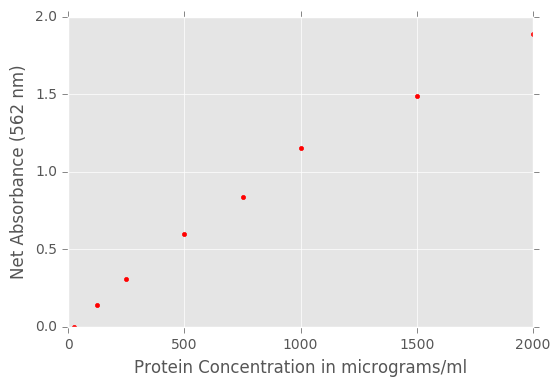

In [11]:
concentration = [2000, 1500, 1000, 750, 500, 250, 125, 25]
absorbance = data["std_average_background_subtract"]

plt.plot(concentration, absorbance, 'r.')
plt.xlabel('Protein Concentration in micrograms/ml')
plt.ylabel('Net Absorbance (562 nm)')
plt.show()


0.0701403460588
0.000953394671793


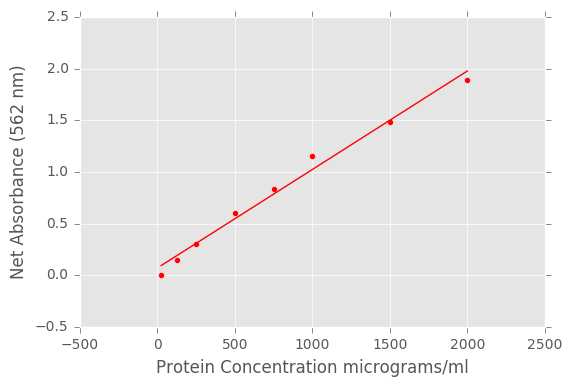

In [12]:
from pylab import *

(m,b) = polyfit(concentration, absorbance, 1)
print(b)
print(m)

abs_poly = polyval([m, b], concentration)

plot(concentration, abs_poly, '-r')
scatter(concentration, absorbance, c = 'red')
xlabel('Protein Concentration micrograms/ml')
ylabel('Net Absorbance (562 nm)')
show()


In [13]:
data["sample_abs_background_subtract"] = data["3"] - data["std_average"][len(data)-1]
data["final_sample_concentrations"] = (data["sample_abs_background_subtract"] - b)/m
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13,std_average,std_average_background_subtract,sample_abs_background_subtract,final_sample_concentrations
0,A,1.880,2.174,1.272,0.045,0.046,0.046,0.047,0.046,0.048,0.048,0.047,0.046,562,2.0270,1.8915,1.1365,1118.487113
1,B,1.516,1.731,0.997,0.047,0.046,0.047,0.046,0.045,0.046,0.046,0.047,0.046,562,1.6235,1.4880,0.8615,830.044133
2,C,1.204,1.378,0.738,0.046,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.047,562,1.2910,1.1555,0.6025,558.383290
3,D,0.922,1.021,0.772,0.046,0.046,0.046,0.045,0.045,0.047,0.047,0.047,0.046,562,0.9715,0.8360,0.6365,594.045332
4,E,0.682,0.792,0.475,0.047,0.046,0.045,0.045,0.046,0.046,0.047,0.047,0.047,562,0.7370,0.6015,0.3395,282.526913
5,F,0.425,0.461,0.409,0.046,0.046,0.045,0.046,0.045,0.046,0.050,0.048,0.046,562,0.4430,0.3075,0.2735,213.300598
6,G,0.275,0.285,0.284,0.046,0.045,0.045,0.045,0.046,0.047,0.047,0.047,0.046,562,0.2800,0.1445,0.1485,82.190153
7,H,0.134,0.137,0.267,0.047,0.046,0.045,0.045,0.046,0.047,0.047,0.047,0.047,562,0.1355,0.0000,0.1315,64.359132


In [14]:
# Chekcer

x = [2000, 1500, 1000, 750, 500, 250, 125, 25, -75, 250, 0.0]
values = []
for i in x:
    value = m*i + b
    values.append(value)
values

[1.9769296896457018,
 1.5002323537489701,
 1.0235350178522384,
 0.7851863499038727,
 0.54683768195550686,
 0.30848901400714107,
 0.18931468003295815,
 0.093975212853611823,
 -0.0013642543257345041,
 0.30848901400714107,
 0.070140346058775241]